In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import sys
from matplotlib.patches import Rectangle

In [2]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url) # get state file from the web - states geodataframe - could also upload a .shp,.gpkg, etc.
states_gdf = states_gdf.cx[-130:-100,35:55] # subset using lat lon's to just the western US
california=states_gdf[states_gdf['NAME']=='California'] # make another geodataframe (gdf)

In [3]:
# open a dataset with a terrain grid ussing xarray - could also use rioxarray
ds=xr.open_dataset('/Users/wcurrier/Desktop/Livneh_WUS_params_from_params.CONUS_MX.MOD_IGBP.mode.2000_2016_updatedCAandCO.5.11.23.nc')

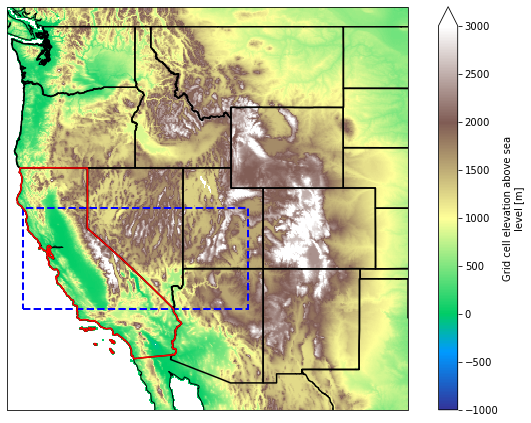

In [4]:
ax=plt.axes((0,0,1.4,1.4),projection=ccrs.PlateCarree())
ds['elev'].plot(cmap='terrain',vmin=-1000,vmax=3000)
states_gdf.boundary.plot(color='black',ax=ax)
california.boundary.plot(color='red',ax=ax)
ax.coastlines()
plt.xlim([-125,-100]),plt.ylim([30,50])
# Define the coordinates of the custom rectangle
rectangle_coords = [(-124, 35), (-110, 40)]  # (longitude, latitude) for the bottom-left and top-right corners
# Create a rectangle patch and add it to the plot
rectangle = Rectangle(rectangle_coords[0], rectangle_coords[1][0] - rectangle_coords[0][0], rectangle_coords[1][1] - rectangle_coords[0][1],
                      linewidth=2, edgecolor='blue', facecolor='none',linestyle='--')
plt.gca().add_patch(rectangle)
